<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/master/Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Set up Tensorboard Logging**

In [ ]:
%load_ext tensorboard


# Clear any tensorflow logs from previous runs
!rm -rf ./logs/ 

**Import Dataset**

Datset are in the form of Numpy arrays


In [11]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
tensorflow.random.set_seed(1234)
from skimage import transform as tf

import random


path='/content/drive/My Drive/Balanced Dataset/'
Dataset='samplepair224'
batch_size=32


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset)


**Data Normalization**

Total number of outputs :  2
Output classes :  [0 1]
(224, 224, 3)
250


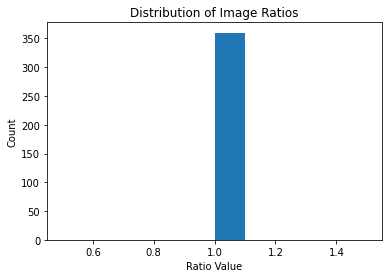

In [3]:


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
input_shape=(img_rows,img_cols,3)
print(input_shape)
print(len(x_train))


y = dict()
y[0] = []
y[1] = []
for set_name in (y_train,y_testing):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(x=['Train Set', 'Test Set'],y=y[0],name='No',marker=dict(color='#33cc33'),opacity=0.7)
trace1 = go.Bar(x=['Train Set','Test Set'],y=y[1],name='Yes',marker=dict(color='#ff3300'),opacity=0.7)
data = [trace0, trace1]
layout = go.Layout(title='Count of classes in each set',xaxis={'title': 'Set'},yaxis={'title': 'Count'})
fig = go.Figure(data, layout)
iplot(fig)



RATIO_LIST = []
for set in (x_train, x_test):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

**Define Image generators**

In [13]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True)
val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d%h$m%s"))
Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

**CNN Architecture**

In [2]:
from keras.applications.vgg19 import VGG19
# load the model
model = VGG19()
# summarize the model
model.summary()

# from keras.regularizers import l2
# model=Sequential()
# model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(2,2))


# model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))


# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.001)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# # model.add(Conv2D(160, (3, 3), kernel_regularizer=l2(0.00001)))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.2)
# # model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.0001)))
# # model.add(Activation('relu'))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(2))
# model.add(Dropout(0.2))
# model.add(Activation("softmax"))
# print(model.summary())


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# sparse_categorical_crossentropy

# Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

# print("Number of weights after calling the model:", len(model.weights)) 


574717952/574710816 [==============================] - 6s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

**Fit Model**

In [14]:
epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)


# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=1,
      shuffle=True
      ,
     callbacks=[earlystop, learning_rate_reduction,mc]
     )

# print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(
# history.history['val_loss'][-1], 
# history.history['val_accuracy'][-1]))

# saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_testing, predicted_classes, target_names=target_names))

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



6/6 [==============================] - 5s 778ms/step - loss: 0.6663 - accuracy: 0.6223 - val_loss: 0.7190 - val_accuracy: 0.6627
Epoch 2/50
6/6 [==============================] - 2s 339ms/step - loss: 0.6582 - accuracy: 0.6649 - val_loss: 0.7303 - val_accuracy: 0.6627
Epoch 3/50
6/6 [==============================] - 2s 335ms/step - loss: 0.6425 - accuracy: 0.6649 - val_loss: 0.6263 - val_accuracy: 0.6627
Epoch 4/50
6/6 [==============================] - 2s 335ms/step - loss: 0.6480 - accuracy: 0.6649 - val_loss: 0.6603 - val_accuracy: 0.6627
Epoch 5/50
6/6 [==============================] - 2s 335ms/step - loss: 0.6393 - accuracy: 0.6649 - val_loss: 0.5866 - val_accuracy: 0.6627
Epoch 6/50
6/6 [==============================] - 2s 335ms/step - loss: 0.6481 - accuracy: 0.6649 - val_loss: 0.7239 - val_accuracy: 0.6627
Epoch 7/50
6/6 [==============================] - 2s 335ms/step - loss: 0.6433 - accuracy: 0.6649 - val_loss: 0.7038 - val_accuracy: 0.6627
Epoch 8/50
6/6 [===============

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Plot the training and validation accuracy**

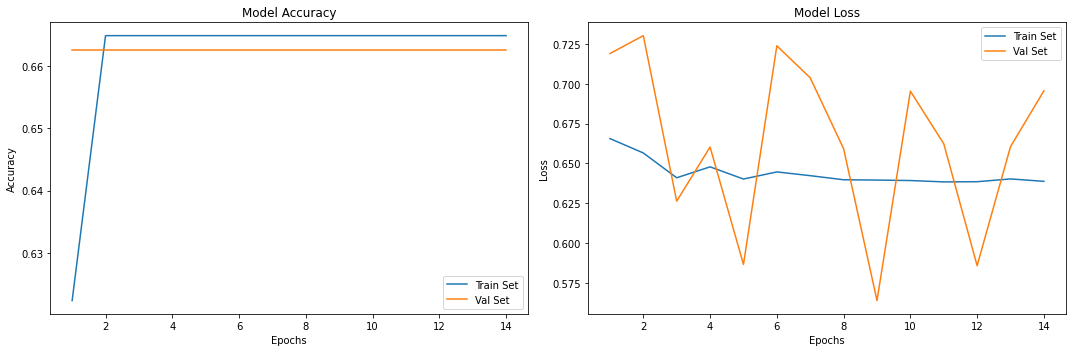

In [15]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()


# predictions =model.predict_classes(x_test, verbose=1)
# validate on val set

# predictions = [1 if x>0.5 else 0 for x in predictions]
# print(predictions)
# accuracy = accuracy_score(y_testing, predictions)
# print('Val Accuracy = %.2f' % accuracy)

# confusion_mtx = confusion_matrix(y_testing, predictions) 
# cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

**Calculate roc curve and area under curve**

In [ ]:
fpr , tpr , thresholds = roc_curve ( y_testing , y_val_cat_prob)
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
plot_roc_curve (fpr,tpr)


auc_score=roc_auc_score(y_testing,y_val_cat_prob)
print(auc_score)

**Confusion Matrix**

In [ ]:
his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_testing, predicted_classes, target_names=target_names))


confusion_mtx = confusion_matrix(y_testing, predicted_classes) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)




**Save** **Model** 

In [ ]:
%tensorboard --port=5036 --logdir $logdir

In [ ]:

model.save('/content/drive/My Drive/Tensorflow/No Aug Path.h5')

In [ ]:
!kill 606

In [1]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
tensorflow.random.set_seed(1234)
from skimage import transform as tf

import random




path='/content/drive/My Drive/Balanced Dataset/'
batch_size=32

# Dataset=['brain_tumor_dataset244','brain_tumor_dataset244starry_night','brain_tumor_dataset244the_wave'
# ,'brain_tumor_dataset244udnie','brain_tumor_dataset244candy','brain_tumor_dataset244composition_vii'
# ,'brain_tumor_dataset244feathers','brain_tumor_dataset244la_muse','brain_tumor_dataset244mosaic','brain_tumor_dataset244scream']


Dataset=['Original224','NSTstarry_night224','NSTthe_wave224'
,'NSTudnie224','NSTcandy224','NSTcomposition_vii224'
,'NSTfeathers224','NSTla_muse224','NSTmosaic224','NSTthe_scream224','samplepair224']

# Dataset=['Original224','NSTstarry_night_covid224','NSTthe_wave224'
# ,'NSTudnie_covid224','NSTcandy_covid224','NSTcomposition_vii_covid224'
# ,'NSTfeathers_covid224','NSTla_muse_covid224','NSTmosaic_covid224','NSTthe_scream224','samplepair_covid224']


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

# (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset)

def data_processing(x_train,y_train,x_test,y_testing):
    y_train=y_train.reshape(y_train.shape[0],1)
    y_testing=y_testing.reshape(y_testing.shape[0],1)
    x_train=x_train.astype('float32')
    x_test=x_test.astype('float32')

    x_train/=255
    x_test/=255
    classes = np.unique(y_train)
    nClasses = len(classes)
    num_classes = len(classes)
    img_rows=x_train[0].shape[0]
    img_cols=x_train[1].shape[0]
    input_shape=(img_rows,img_cols,3)
    return x_train,y_train, x_test,y_testing

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d%h$m%s"))
Logger=keras.callbacks.TensorBoard(log_dir=logdir,write_graph=True,histogram_freq=1)

from keras.applications.vgg19 import VGG19
# load the model
model = VGG19()
# summarize the model
model.summary()
optimizer = keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



def train_on_x_samples(batch_size=32, steps=100):
        validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)
        train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)
        history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=steps,
                    epochs=epochs,
                    verbose=0,
                    shuffle=True,
                    callbacks=[earlystop, learning_rate_reduction,mc],
                    validation_data=validation_generator )

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs_range = range(1, len(history.epoch) + 1)
        plt.figure(figsize=(15,5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Train Set')
        plt.plot(epochs_range, val_acc, label='Val Set')
        plt.legend(loc="best")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Train Set')
        plt.plot(epochs_range, val_loss, label='Val Set')
        plt.legend(loc="best")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Model Loss')

        plt.tight_layout()
        plt.show()

        return history



def train_acc_results(x_train,y_train):
    _, train_acc = model.evaluate(x_train, y_train, verbose=0)
    print('Train: %.3f' % (train_acc))
    a=train_acc
    return train_acc

def test_acc_results(x_test,y_testing):
    _, test_acc = model.evaluate(x_test,y_testing, verbose=0)
    print('Test: %.3f' % ( test_acc))
    v=test_acc
    return test_acc


mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


Using TensorFlow backend.


574717952/574710816 [==============================] - 41s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

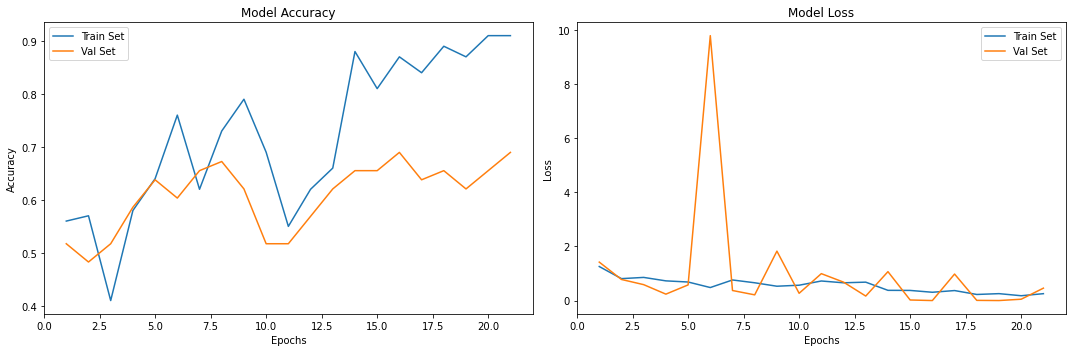

Train: 0.848
Test: 0.655
             Class 0    Class 1  accuracy  macro avg  weighted avg       aug
precision   0.681818   0.638889  0.655172   0.660354      0.659613  Original
recall      0.535714   0.766667  0.655172   0.651190      0.655172  Original
f1-score    0.600000   0.696970  0.655172   0.648485      0.650157  Original
support    28.000000  30.000000  0.655172  58.000000     58.000000  Original


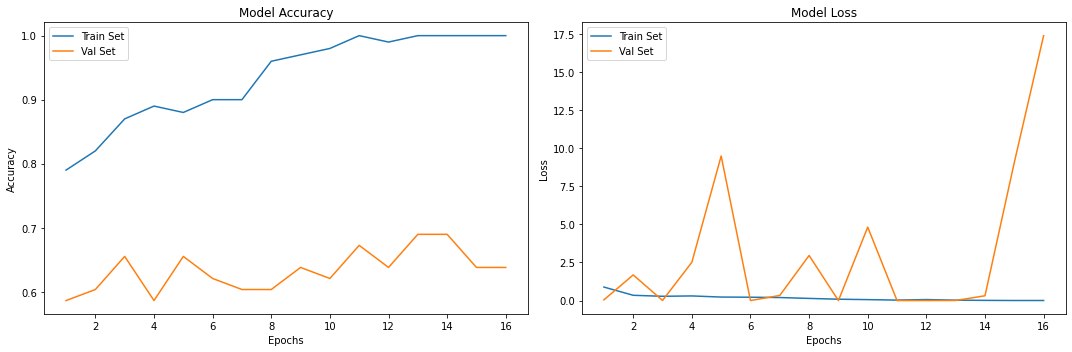

Train: 1.000
Test: 0.655
             Class 0    Class 1  ...  weighted avg             aug
precision   0.681818   0.638889  ...      0.659613  HorizontalFlip
recall      0.535714   0.766667  ...      0.655172  HorizontalFlip
f1-score    0.600000   0.696970  ...      0.650157  HorizontalFlip
support    28.000000  30.000000  ...     58.000000  HorizontalFlip

[4 rows x 6 columns]


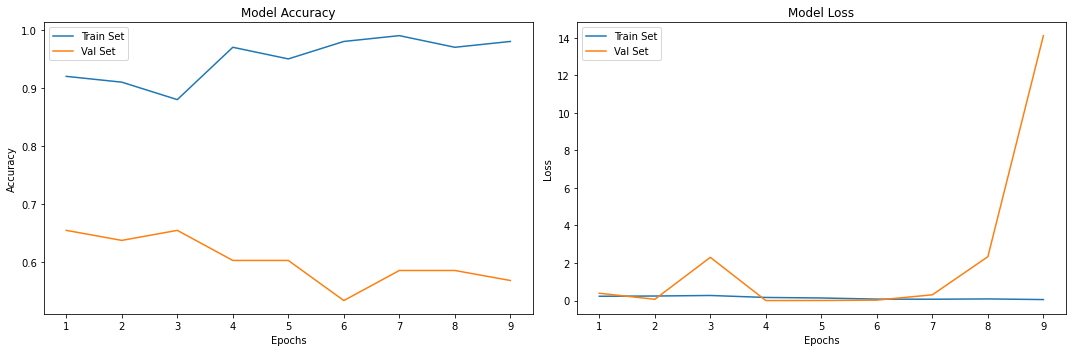

Train: 1.000
Test: 0.569
             Class 0    Class 1  accuracy  macro avg  weighted avg          aug
precision   0.560000   0.575758  0.568966   0.567879      0.568150  vertialFLip
recall      0.500000   0.633333  0.568966   0.566667      0.568966  vertialFLip
f1-score    0.528302   0.603175  0.568966   0.565738      0.567029  vertialFLip
support    28.000000  30.000000  0.568966  58.000000     58.000000  vertialFLip


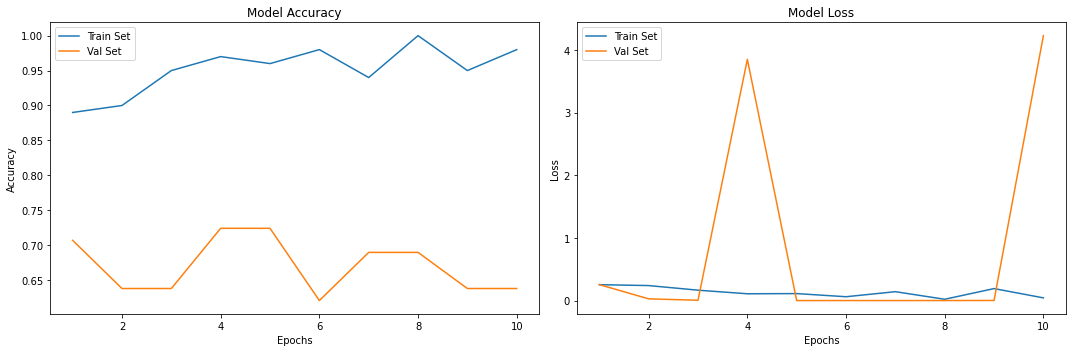

Train: 1.000
Test: 0.638
             Class 0    Class 1  accuracy  macro avg  weighted avg       aug
precision   0.666667   0.621622  0.637931   0.644144      0.643368  Rotation
recall      0.500000   0.766667  0.637931   0.633333      0.637931  Rotation
f1-score    0.571429   0.686567  0.637931   0.628998      0.630983  Rotation
support    28.000000  30.000000  0.637931  58.000000     58.000000  Rotation


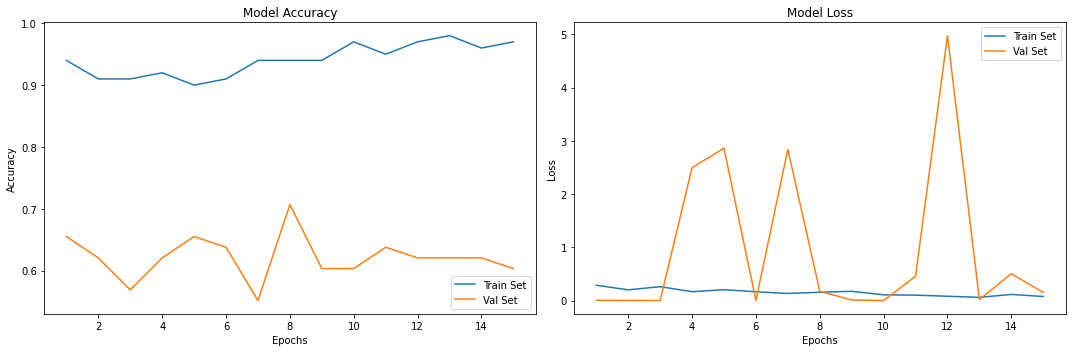

Train: 1.000
Test: 0.603
             Class 0    Class 1  accuracy  macro avg  weighted avg    aug
precision   0.586207   0.620690  0.603448   0.603448      0.604043  shear
recall      0.607143   0.600000  0.603448   0.603571      0.603448  shear
f1-score    0.596491   0.610169  0.603448   0.603330      0.603566  shear
support    28.000000  30.000000  0.603448  58.000000     58.000000  shear


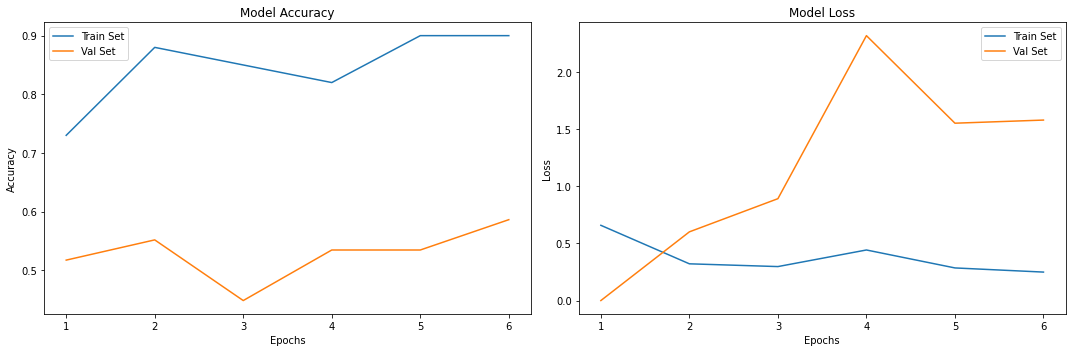

Train: 0.977
Test: 0.638
             Class 0    Class 1  ...  weighted avg                aug
precision   0.666667   0.621622  ...      0.643368  width_shift_range
recall      0.500000   0.766667  ...      0.637931  width_shift_range
f1-score    0.571429   0.686567  ...      0.630983  width_shift_range
support    28.000000  30.000000  ...     58.000000  width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



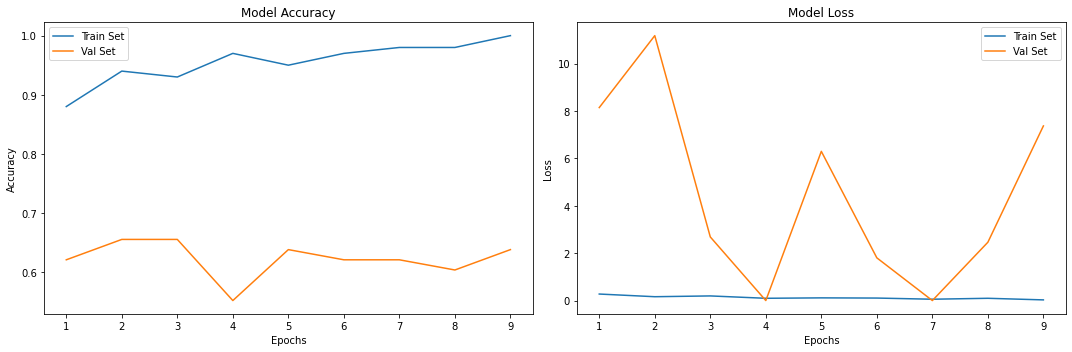

Train: 1.000
Test: 0.603
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.619048   0.594595  ...      0.606400  Horizontal+vertical
recall      0.464286   0.733333  ...      0.603448  Horizontal+vertical
f1-score    0.530612   0.656716  ...      0.595839  Horizontal+vertical
support    28.000000  30.000000  ...     58.000000  Horizontal+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



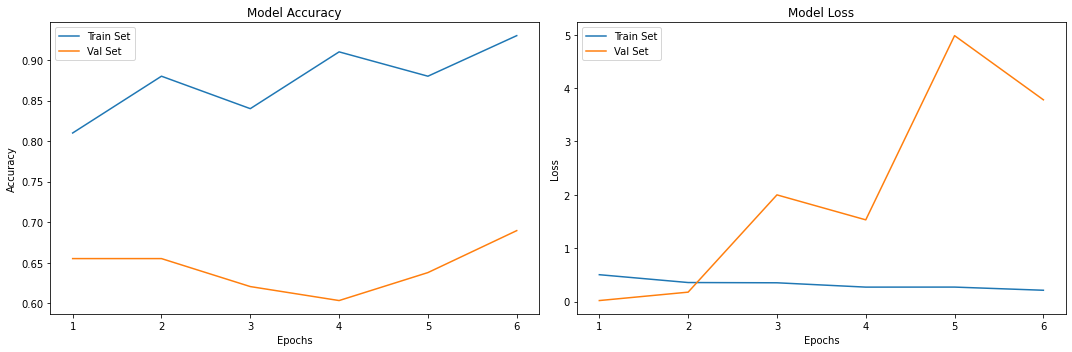

Train: 1.000
Test: 0.586
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.583333   0.588235  ...      0.585869  Horizonta+Rotation
recall      0.500000   0.666667  ...      0.586207  Horizonta+Rotation
f1-score    0.538462   0.625000  ...      0.583223  Horizonta+Rotation
support    28.000000  30.000000  ...     58.000000  Horizonta+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



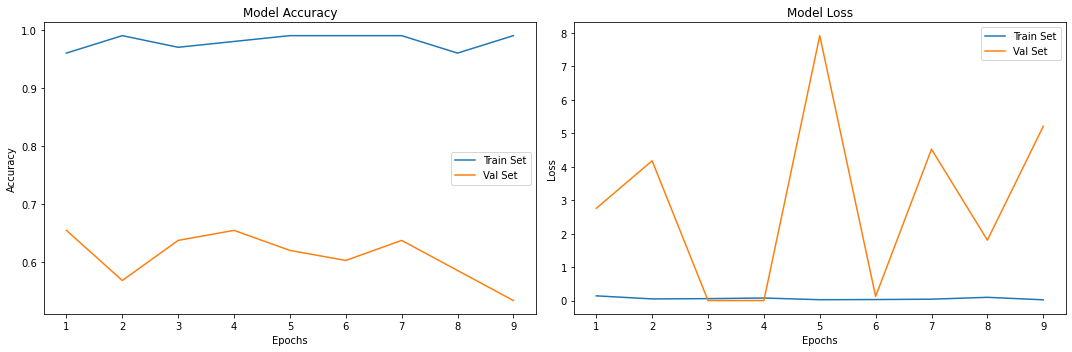

Train: 0.985
Test: 0.552
             Class 0    Class 1  ...  weighted avg              aug
precision   0.535714   0.566667  ...      0.551724  Horizonta+shear
recall      0.535714   0.566667  ...      0.551724  Horizonta+shear
f1-score    0.535714   0.566667  ...      0.551724  Horizonta+shear
support    28.000000  30.000000  ...     58.000000  Horizonta+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



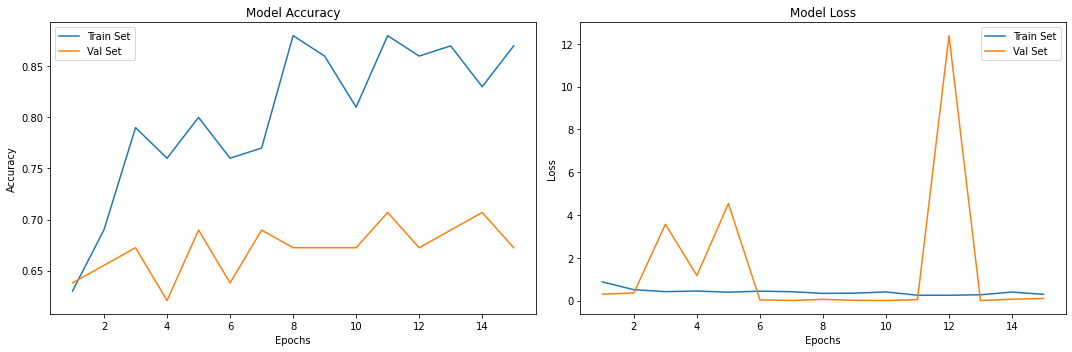

Train: 0.962
Test: 0.690
             Class 0    Class 1  ...  weighted avg                          aug
precision   0.777778   0.650000  ...      0.711686  Horizonta+width_shift_range
recall      0.500000   0.866667  ...      0.689655  Horizonta+width_shift_range
f1-score    0.608696   0.742857  ...      0.678090  Horizonta+width_shift_range
support    28.000000  30.000000  ...     58.000000  Horizonta+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



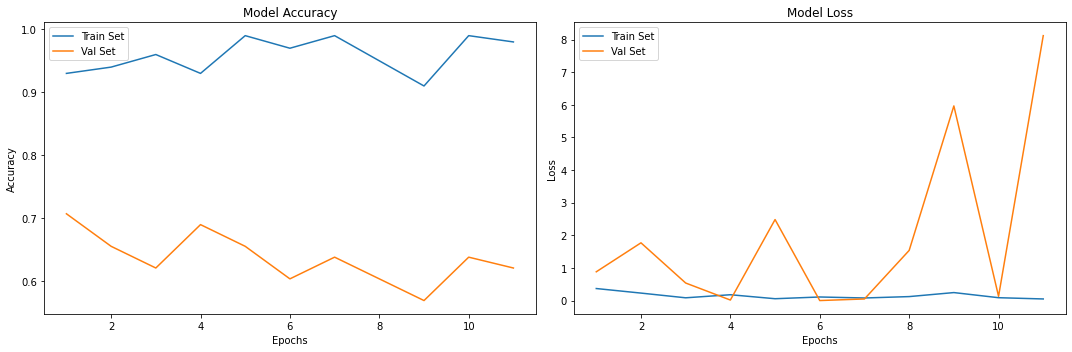

Train: 1.000
Test: 0.655
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.750000   0.619048  ...      0.682266  vertialFLip+Rotation
recall      0.428571   0.866667  ...      0.655172  vertialFLip+Rotation
f1-score    0.545455   0.722222  ...      0.636886  vertialFLip+Rotation
support    28.000000  30.000000  ...     58.000000  vertialFLip+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



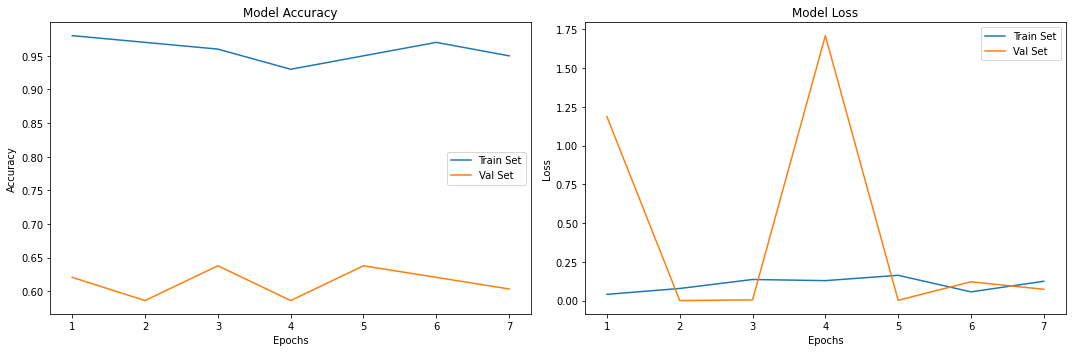

Train: 0.992
Test: 0.603
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.592593   0.612903  ...      0.603098  vertialFLip+Rotation
recall      0.571429   0.633333  ...      0.603448  vertialFLip+Rotation
f1-score    0.581818   0.622951  ...      0.603094  vertialFLip+Rotation
support    28.000000  30.000000  ...     58.000000  vertialFLip+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



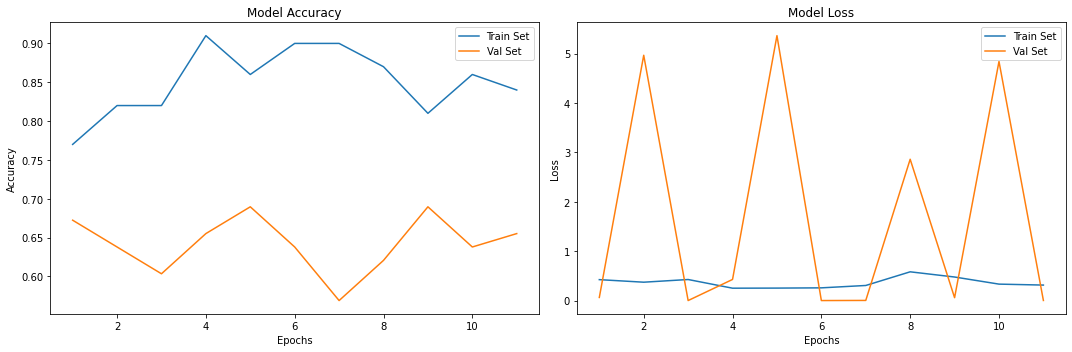

Train: 1.000
Test: 0.672
             Class 0    Class 1  ...  weighted avg                aug
precision   0.736842   0.641026  ...      0.687282  vertialFLip+shear
recall      0.500000   0.833333  ...      0.672414  vertialFLip+shear
f1-score    0.595745   0.724638  ...      0.662413  vertialFLip+shear
support    28.000000  30.000000  ...     58.000000  vertialFLip+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



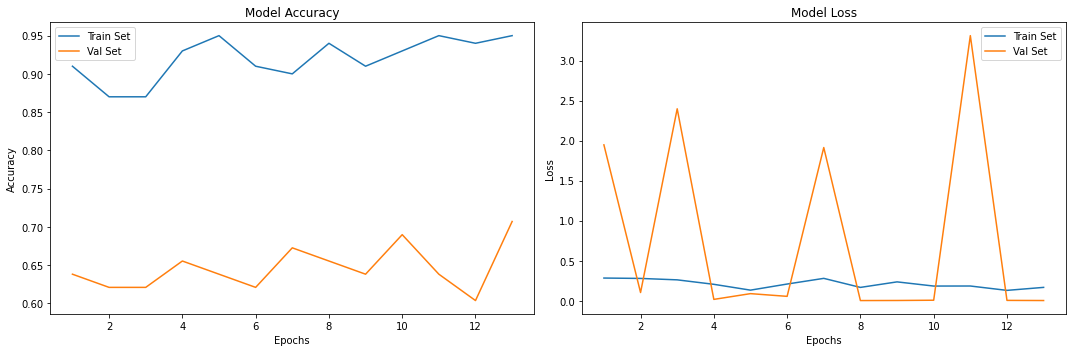

Train: 0.977
Test: 0.690
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.708333   0.676471  ...      0.691853  vertical+width_shift_range
recall      0.607143   0.766667  ...      0.689655  vertical+width_shift_range
f1-score    0.653846   0.718750  ...      0.687417  vertical+width_shift_range
support    28.000000  30.000000  ...     58.000000  vertical+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



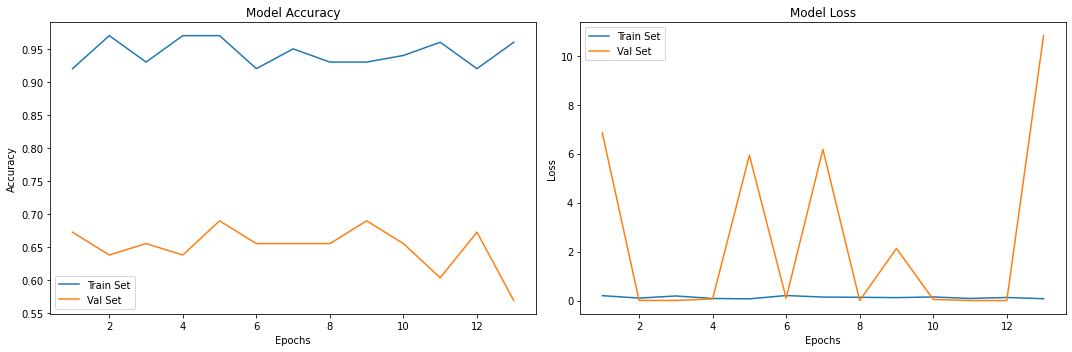

Train: 0.992
Test: 0.621
             Class 0    Class 1  ...  weighted avg                aug
precision   0.666667   0.600000  ...      0.632184  Rotation+vertical
recall      0.428571   0.800000  ...      0.620690  Rotation+vertical
f1-score    0.521739   0.685714  ...      0.606554  Rotation+vertical
support    28.000000  30.000000  ...     58.000000  Rotation+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



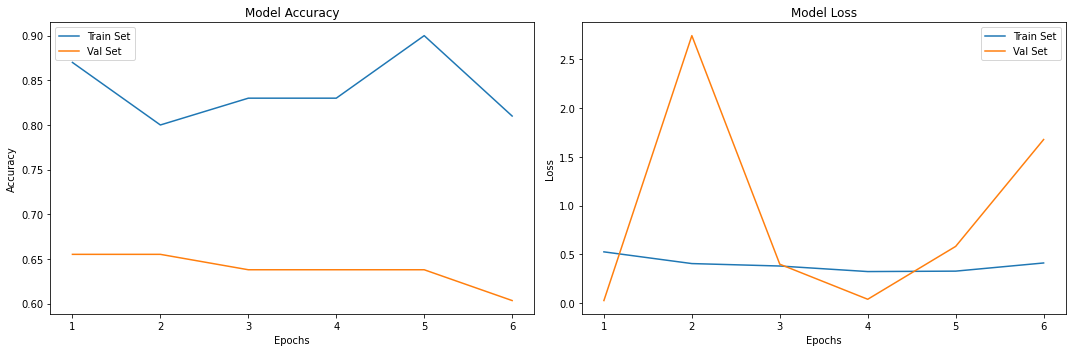

Train: 0.977
Test: 0.638
             Class 0    Class 1  ...  weighted avg                  aug
precision   0.652174   0.628571  ...      0.639966  Horizontal+Rotation
recall      0.535714   0.733333  ...      0.637931  Horizontal+Rotation
f1-score    0.588235   0.676923  ...      0.634108  Horizontal+Rotation
support    28.000000  30.000000  ...     58.000000  Horizontal+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



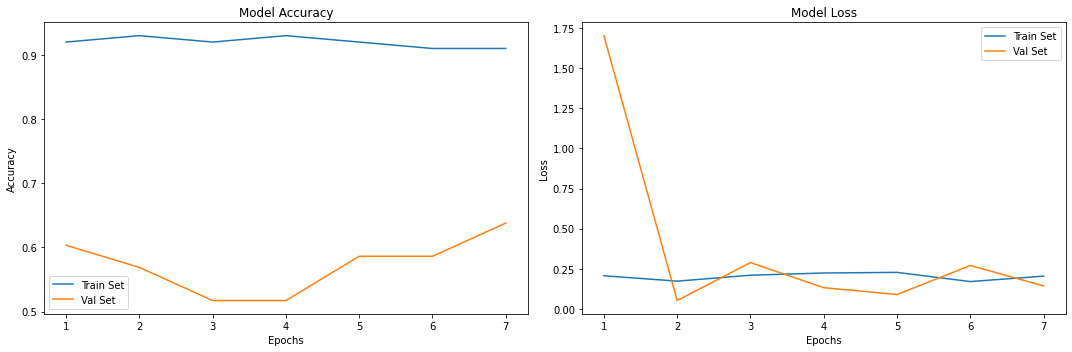

Train: 1.000
Test: 0.672
             Class 0    Class 1  ...  weighted avg             aug
precision   0.764706   0.634146  ...      0.697175  shear+Rotation
recall      0.464286   0.866667  ...      0.672414  shear+Rotation
f1-score    0.577778   0.732394  ...      0.657752  shear+Rotation
support    28.000000  30.000000  ...     58.000000  shear+Rotation

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



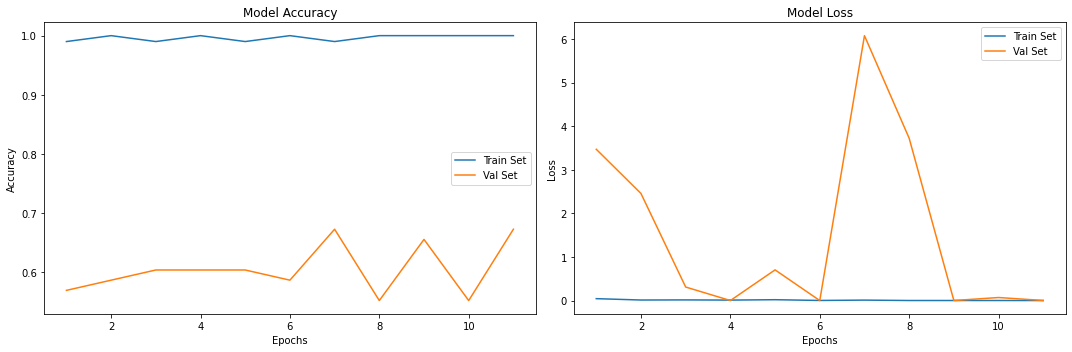

Train: 1.000
Test: 0.638
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.652174   0.628571  ...      0.639966  Rotation+width_shift_range
recall      0.535714   0.733333  ...      0.637931  Rotation+width_shift_range
f1-score    0.588235   0.676923  ...      0.634108  Rotation+width_shift_range
support    28.000000  30.000000  ...     58.000000  Rotation+width_shift_range

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



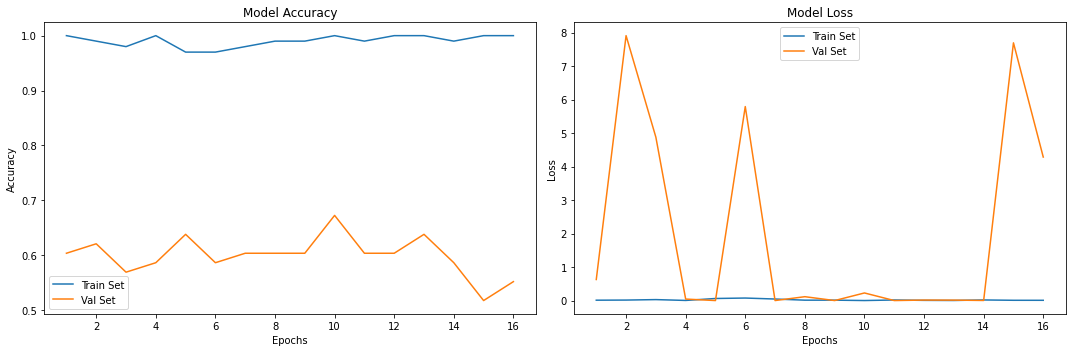

Train: 1.000
Test: 0.621
             Class 0    Class 1  ...  weighted avg             aug
precision   0.666667   0.600000  ...      0.632184  shear+vertical
recall      0.428571   0.800000  ...      0.620690  shear+vertical
f1-score    0.521739   0.685714  ...      0.606554  shear+vertical
support    28.000000  30.000000  ...     58.000000  shear+vertical

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



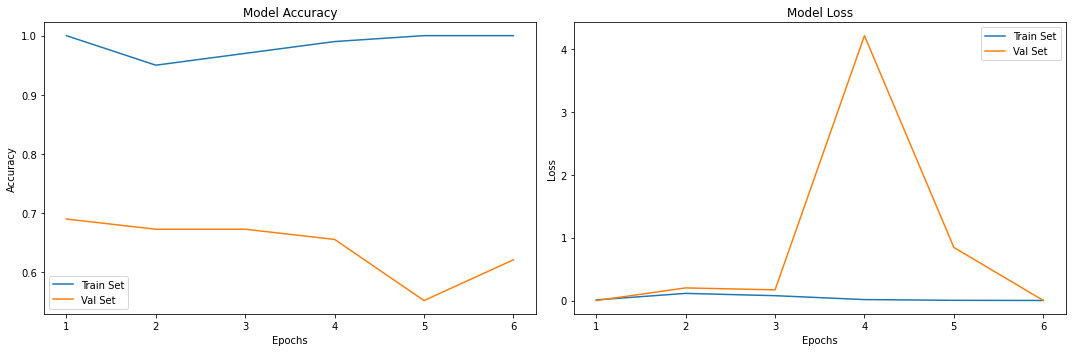

Train: 1.000
Test: 0.707
             Class 0    Class 1  ...  weighted avg               aug
precision   0.789474   0.666667  ...      0.725953  Horizontal+shear
recall      0.535714   0.866667  ...      0.706897  Horizontal+shear
f1-score    0.638298   0.753623  ...      0.697949  Horizontal+shear
support    28.000000  30.000000  ...     58.000000  Horizontal+shear

[4 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning:

This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



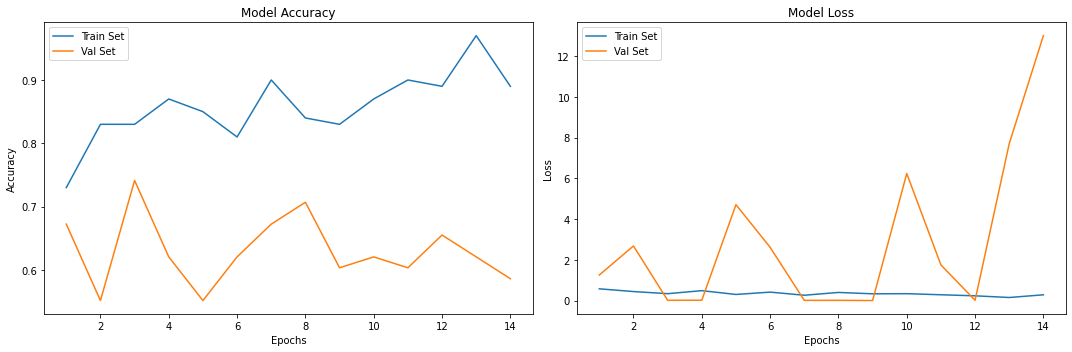

Train: 1.000
Test: 0.741
             Class 0    Class 1  ...  weighted avg             aug
precision   0.882353   0.682927  ...      0.779202  shear+Rotation
recall      0.535714   0.933333  ...      0.741379  shear+Rotation
f1-score    0.666667   0.788732  ...      0.729804  shear+Rotation
support    28.000000  30.000000  ...     58.000000  shear+Rotation

[4 rows x 6 columns]
Ensemble Augmentation for Generic Augmentation


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,acc,val acc
precision,0.681818,0.638889,0.655172,0.660354,0.659613,Original,91.000003,NaN
recall,0.535714,0.766667,0.655172,0.651190,0.655172,Original,91.000003,NaN
f1-score,0.600000,0.696970,0.655172,0.648485,0.650157,Original,91.000003,NaN
support,28.000000,30.000000,0.655172,58.000000,58.000000,Original,91.000003,NaN
precision,0.681818,0.638889,0.655172,0.660354,0.659613,HorizontalFlip,100.000000,63.793105
recall,0.535714,0.766667,0.655172,0.651190,0.655172,HorizontalFlip,100.000000,63.793105
f1-score,0.600000,0.696970,0.655172,0.648485,0.650157,HorizontalFlip,100.000000,63.793105
support,28.000000,30.000000,0.655172,58.000000,58.000000,HorizontalFlip,100.000000,63.793105
precision,0.560000,0.575758,0.568966,0.567879,0.568150,vertialFLip,98.000002,56.896549
recall,0.500000,0.633333,0.568966,0.566667,0.568966,vertialFLip,98.000002,56.896549


In [22]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]
Aug=['Original','HorizontalFlip','vertialFLip','Rotation','shear','width_shift_range'
,'Horizontal+vertical','Horizonta+Rotation','Horizonta+shear','Horizonta+width_shift_range'
,'vertialFLip+Rotation','vertialFLip+Rotation','vertialFLip+shear','vertical+width_shift_range'
,'Rotation+vertical','Horizontal+Rotation','shear+Rotation','Rotation+width_shift_range'
,'shear+vertical','Horizontal+shear','shear+Rotation','shear+width_shift_range']


for i in range(len(Aug)):
  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)

    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)    
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,vertical_flip=True)
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1



  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==11:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,shear_range=(random.randrange(0,100,10)))
      val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,shear_range=(random.randrange(0,100,10)))
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1    

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,vertical_flip=True,width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1




  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),vertical_flip=True)
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),horizontal_flip=True)
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=(random.randrange(0,360,30)),width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


  elif i==17:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),vertical_flip=True)
      val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),vertical_flip=True)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1


  elif i==18:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),horizontal_flip=True)
      val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),horizontal_flip=True)
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1



  elif i==19:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),rotation_range=(random.randrange(0,360,30)))
      val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),rotation_range=(random.randrange(0,360,30)))
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1


  elif i==20:
      (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])
      data_processing(x_train,y_train,x_test,y_testing)
      datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),width_shift_range=(random.uniform(0.1,0.9)))
      val_datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,shear_range=(random.randrange(0,100,10)),width_shift_range=(random.uniform(0.1,0.9)))
      history = train_on_x_samples(1)
      train_acc_results(x_train,y_train)
      test_acc_results(x_test,y_testing)
      his_df=pd.DataFrame(history.history)
      predicted_classes = model.predict(x_test)
      predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
      target_names = ["Class {}".format(i) for i in range(num_classes)]
      report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
      df=pd.DataFrame(report_dict)
      df['aug']=Aug[i]
      
      print(df)
      df['val acc']=(history.history['val_accuracy'][-1])*100
      df['acc']=(history.history['accuracy'][-1])*100
      Results=Results.append(df)
      i+=1



  if i==21:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)
print('Ensemble Augmentation for Generic Augmentation')
display(Results)


NST ENSEMBLE Augmnetation 
Artistic Style:STARRY NIGHT,THE WAVE,UDNIE

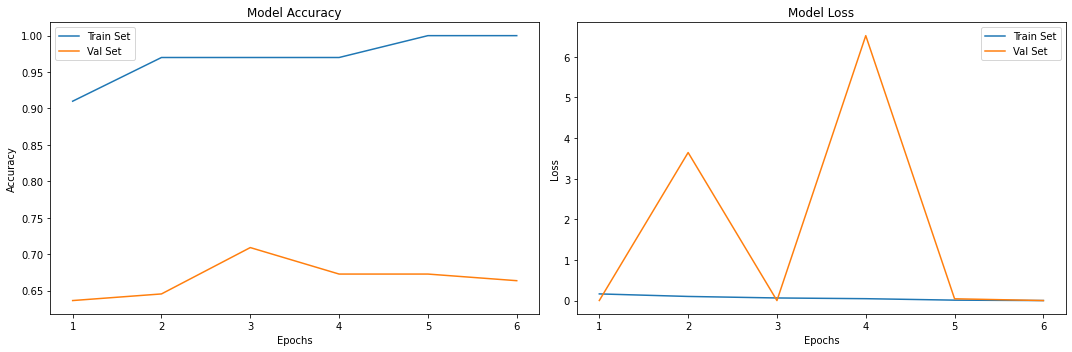

Train: 0.984
Test: 0.682
             Class 0    Class 1  ...  weighted avg           aug
precision   0.777778   0.635135  ...      0.706456  starry_night
recall      0.509091   0.854545  ...      0.681818  starry_night
f1-score    0.615385   0.728682  ...      0.672033  starry_night
support    55.000000  55.000000  ...    110.000000  starry_night

[4 rows x 6 columns]


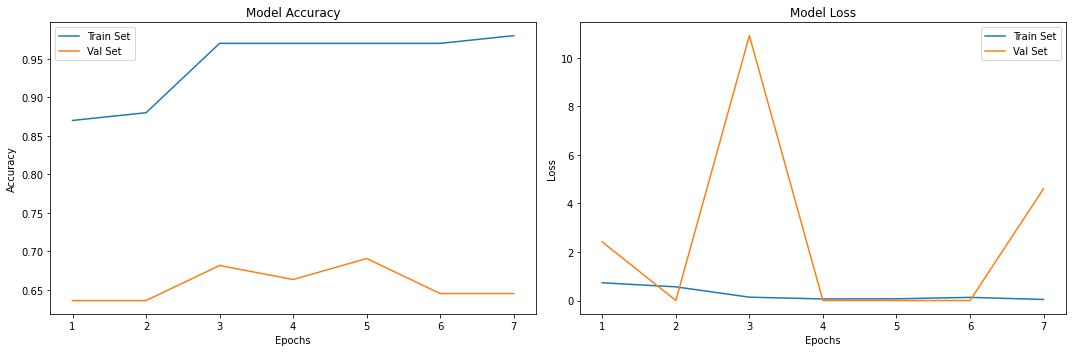

Train: 0.948
Test: 0.627
             Class 0    Class 1  ...  weighted avg                          aug
precision   0.602941   0.666667  ...      0.634804  starry_night_HorizontalFlip
recall      0.745455   0.509091  ...      0.627273  starry_night_HorizontalFlip
f1-score    0.666667   0.577320  ...      0.621993  starry_night_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  starry_night_HorizontalFlip

[4 rows x 6 columns]


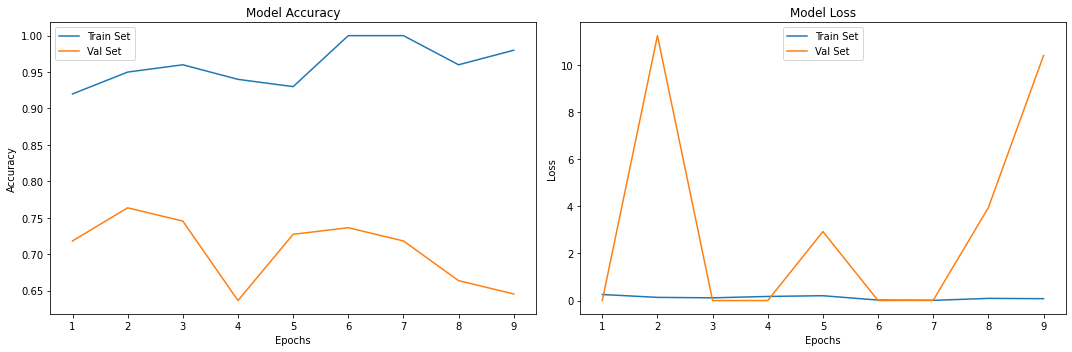

Train: 0.944
Test: 0.645
             Class 0    Class 1  ...  weighted avg                       aug
precision   0.700000   0.614286  ...      0.657143  starry_night_vertialFLip
recall      0.509091   0.781818  ...      0.645455  starry_night_vertialFLip
f1-score    0.589474   0.688000  ...      0.638737  starry_night_vertialFLip
support    55.000000  55.000000  ...    110.000000  starry_night_vertialFLip

[4 rows x 6 columns]


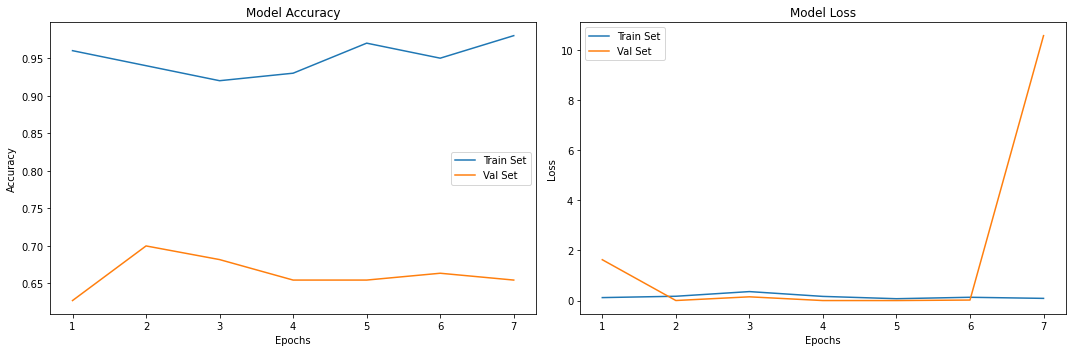

Train: 1.000
Test: 0.664
             Class 0    Class 1  ...  weighted avg                    aug
precision   0.687500   0.645161  ...      0.666331  starry_night_Rotation
recall      0.600000   0.727273  ...      0.663636  starry_night_Rotation
f1-score    0.640777   0.683761  ...      0.662269  starry_night_Rotation
support    55.000000  55.000000  ...    110.000000  starry_night_Rotation

[4 rows x 6 columns]


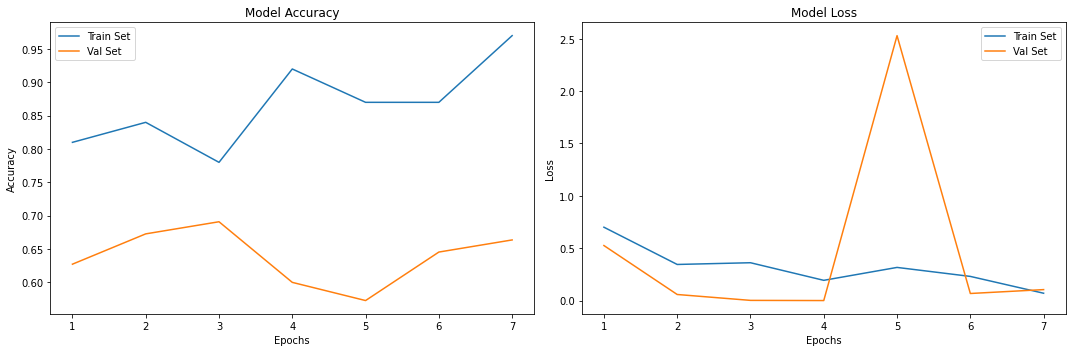

Train: 1.000
Test: 0.682
             Class 0    Class 1  ...  weighted avg                 aug
precision   0.692308   0.672414  ...      0.682361  starry_night_shear
recall      0.654545   0.709091  ...      0.681818  starry_night_shear
f1-score    0.672897   0.690265  ...      0.681581  starry_night_shear
support    55.000000  55.000000  ...    110.000000  starry_night_shear

[4 rows x 6 columns]


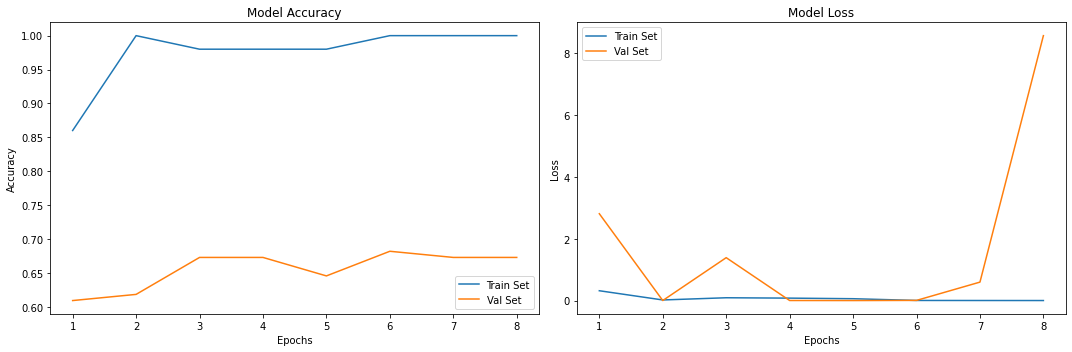

Train: 1.000
Test: 0.627
             Class 0    Class 1  ...  weighted avg                             aug
precision   0.645833   0.612903  ...      0.629368  starry_night_width_shift_range
recall      0.563636   0.690909  ...      0.627273  starry_night_width_shift_range
f1-score    0.601942   0.649573  ...      0.625757  starry_night_width_shift_range
support    55.000000  55.000000  ...    110.000000  starry_night_width_shift_range

[4 rows x 6 columns]


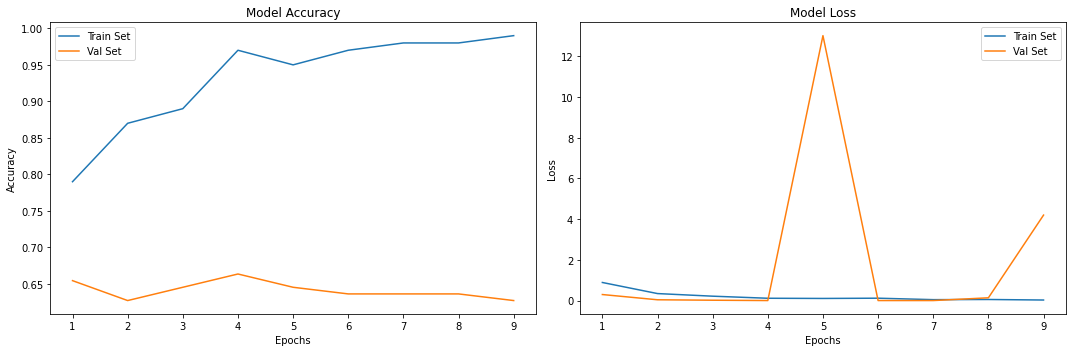

Train: 0.996
Test: 0.618
             Class 0    Class 1  accuracy   macro avg  weighted avg       aug
precision   0.638298   0.603175  0.618182    0.620736      0.620736  the_wave
recall      0.545455   0.690909  0.618182    0.618182      0.618182  the_wave
f1-score    0.588235   0.644068  0.618182    0.616152      0.616152  the_wave
support    55.000000  55.000000  0.618182  110.000000    110.000000  the_wave


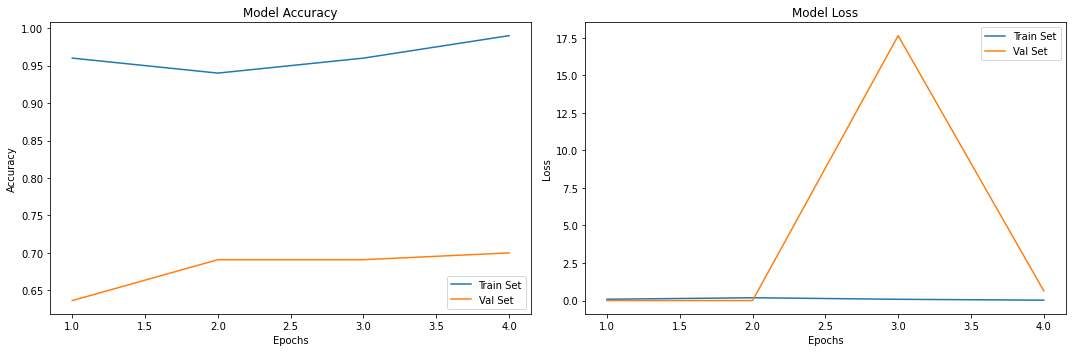

Train: 0.996
Test: 0.664
             Class 0    Class 1  ...  weighted avg                      aug
precision   0.736842   0.625000  ...      0.680921  the_wave_HorizontalFlip
recall      0.509091   0.818182  ...      0.663636  the_wave_HorizontalFlip
f1-score    0.602151   0.708661  ...      0.655406  the_wave_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  the_wave_HorizontalFlip

[4 rows x 6 columns]


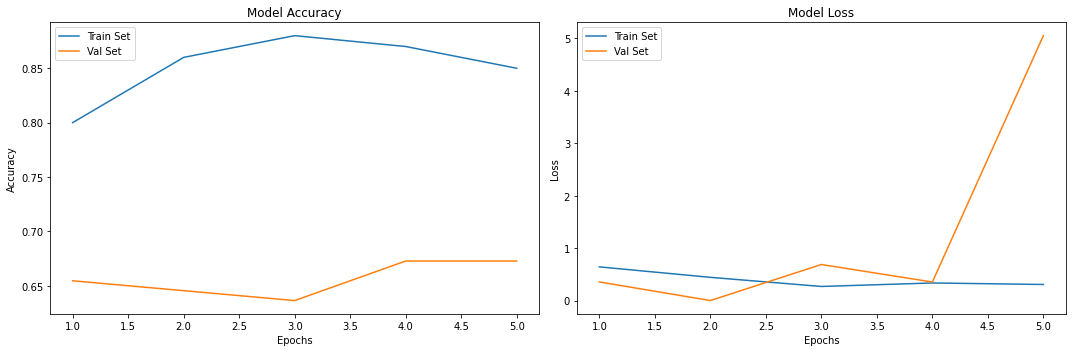

Train: 0.992
Test: 0.691
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.714286   0.672131  ...      0.693208  the_wave_vertialFLip
recall      0.636364   0.745455  ...      0.690909  the_wave_vertialFLip
f1-score    0.673077   0.706897  ...      0.689987  the_wave_vertialFLip
support    55.000000  55.000000  ...    110.000000  the_wave_vertialFLip

[4 rows x 6 columns]


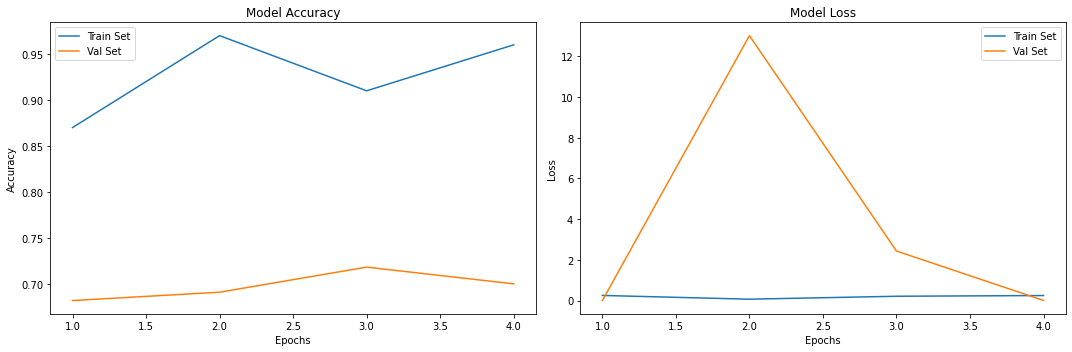

Train: 0.992
Test: 0.682
             Class 0    Class 1  ...  weighted avg                aug
precision   0.692308   0.672414  ...      0.682361  the_wave_Rotation
recall      0.654545   0.709091  ...      0.681818  the_wave_Rotation
f1-score    0.672897   0.690265  ...      0.681581  the_wave_Rotation
support    55.000000  55.000000  ...    110.000000  the_wave_Rotation

[4 rows x 6 columns]


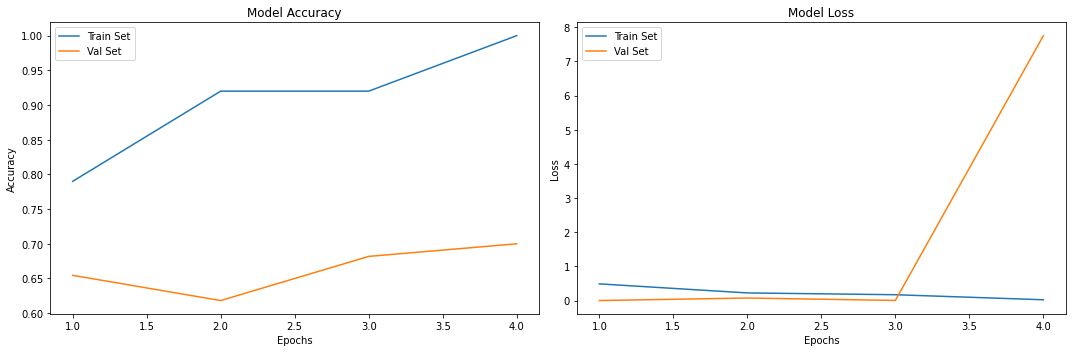

Train: 1.000
Test: 0.718
             Class 0    Class 1  ...  weighted avg             aug
precision   0.815789   0.666667  ...      0.741228  the_wave_shear
recall      0.563636   0.872727  ...      0.718182  the_wave_shear
f1-score    0.666667   0.755906  ...      0.711286  the_wave_shear
support    55.000000  55.000000  ...    110.000000  the_wave_shear

[4 rows x 6 columns]


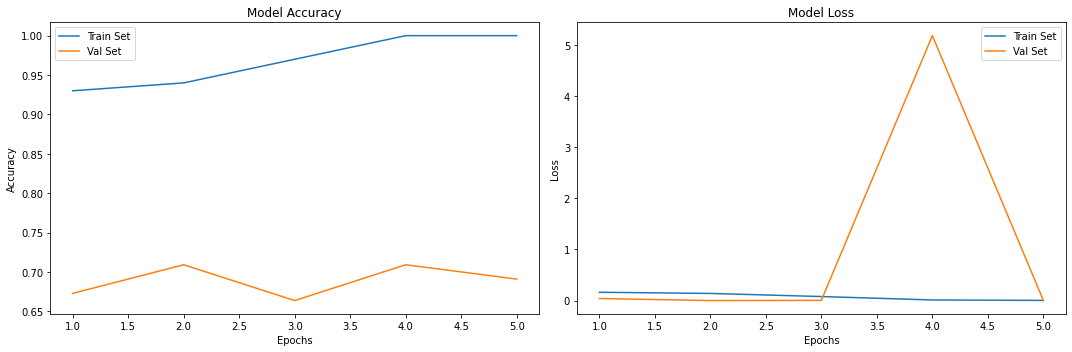

Train: 0.992
Test: 0.700
             Class 0    Class 1  ...  weighted avg                         aug
precision   0.789474   0.652778  ...      0.721126  the_wave_width_shift_range
recall      0.545455   0.854545  ...      0.700000  the_wave_width_shift_range
f1-score    0.645161   0.740157  ...      0.692659  the_wave_width_shift_range
support    55.000000  55.000000  ...    110.000000  the_wave_width_shift_range

[4 rows x 6 columns]


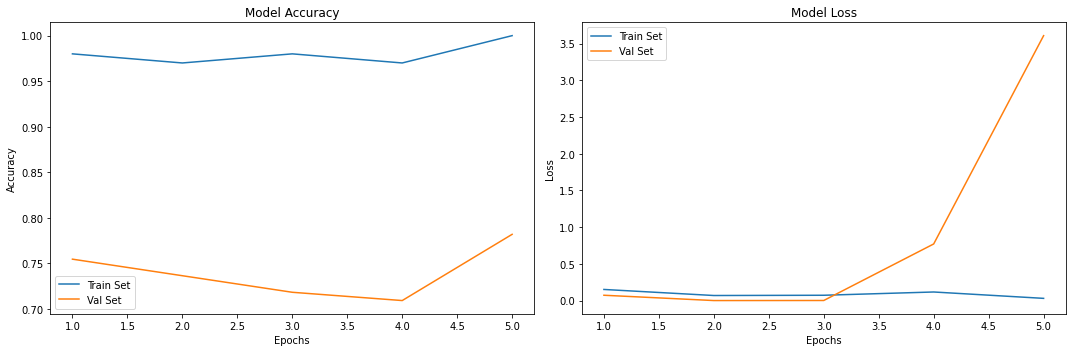

Train: 1.000
Test: 0.782
             Class 0    Class 1  accuracy   macro avg  weighted avg    aug
precision   0.803922   0.762712  0.781818    0.783317      0.783317  udnie
recall      0.745455   0.818182  0.781818    0.781818      0.781818  udnie
f1-score    0.773585   0.789474  0.781818    0.781529      0.781529  udnie
support    55.000000  55.000000  0.781818  110.000000    110.000000  udnie


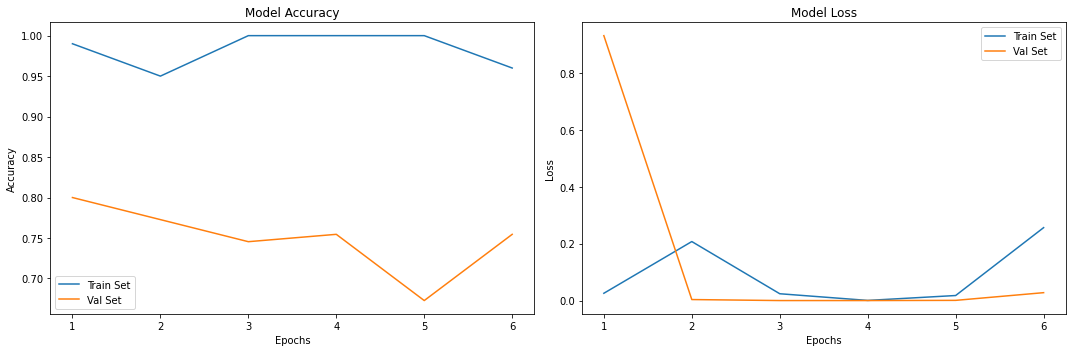

Train: 1.000
Test: 0.727
             Class 0    Class 1  ...  weighted avg                   aug
precision   0.735849   0.719298  ...      0.727574  udnie_HorizontalFlip
recall      0.709091   0.745455  ...      0.727273  udnie_HorizontalFlip
f1-score    0.722222   0.732143  ...      0.727183  udnie_HorizontalFlip
support    55.000000  55.000000  ...    110.000000  udnie_HorizontalFlip

[4 rows x 6 columns]


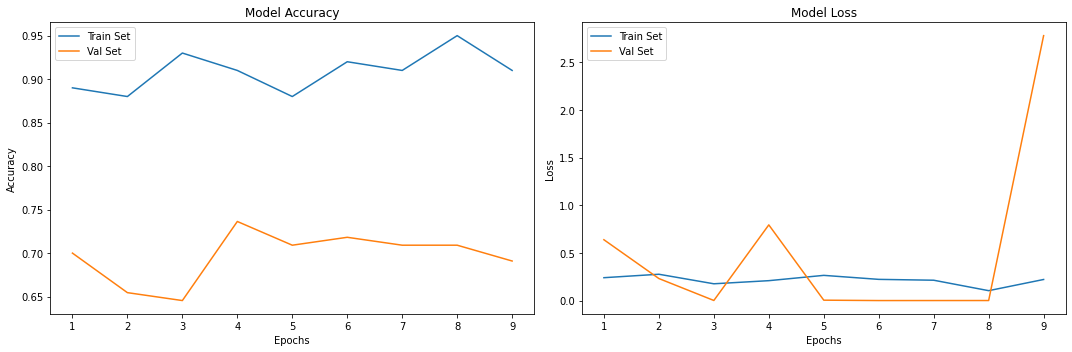

Train: 1.000
Test: 0.673
             Class 0    Class 1  ...  weighted avg                aug
precision   0.743590   0.633803  ...      0.688696  udnie_vertialFLip
recall      0.527273   0.818182  ...      0.672727  udnie_vertialFLip
f1-score    0.617021   0.714286  ...      0.665653  udnie_vertialFLip
support    55.000000  55.000000  ...    110.000000  udnie_vertialFLip

[4 rows x 6 columns]


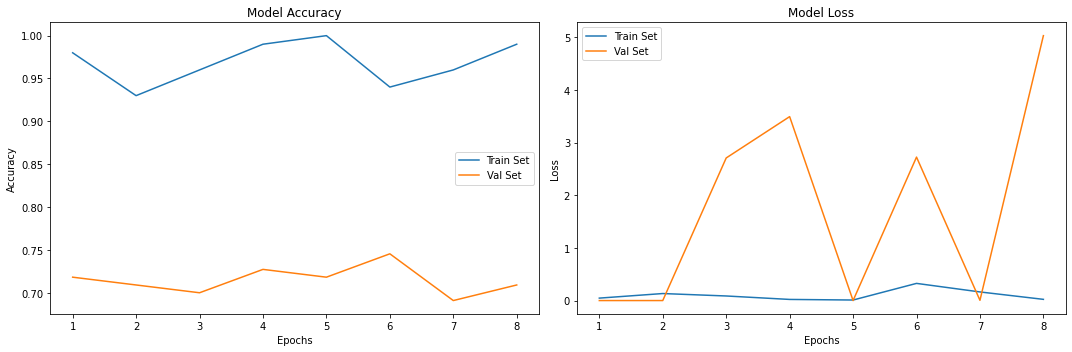

Train: 0.996
Test: 0.700
             Class 0    Class 1  ...  weighted avg             aug
precision   0.739130   0.671875  ...      0.705503  udnie_Rotation
recall      0.618182   0.781818  ...      0.700000  udnie_Rotation
f1-score    0.673267   0.722689  ...      0.697978  udnie_Rotation
support    55.000000  55.000000  ...    110.000000  udnie_Rotation

[4 rows x 6 columns]


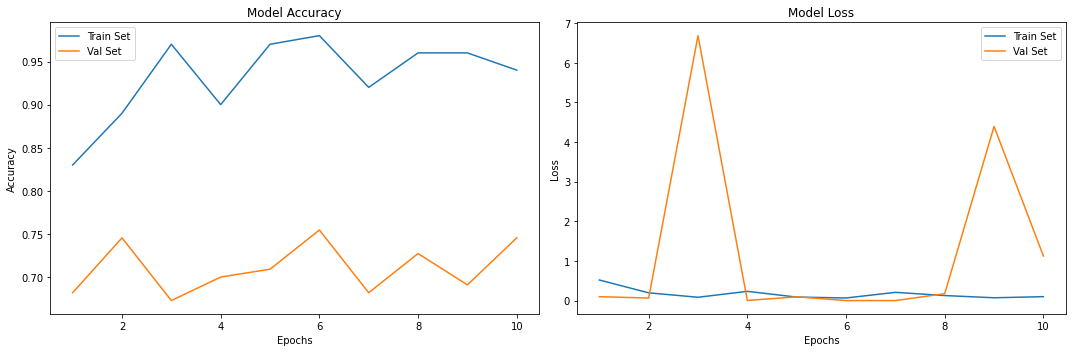

Train: 1.000
Test: 0.755
             Class 0    Class 1  ...  weighted avg          aug
precision   0.804348   0.718750  ...      0.761549  udnie_shear
recall      0.672727   0.836364  ...      0.754545  udnie_shear
f1-score    0.732673   0.773109  ...      0.752891  udnie_shear
support    55.000000  55.000000  ...    110.000000  udnie_shear

[4 rows x 6 columns]


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,val acc,acc
precision,0.777778,0.635135,0.681818,0.706456,0.706456,starry_night,66.363639,100.000000
recall,0.509091,0.854545,0.681818,0.681818,0.681818,starry_night,66.363639,100.000000
f1-score,0.615385,0.728682,0.681818,0.672033,0.672033,starry_night,66.363639,100.000000
support,55.000000,55.000000,0.681818,110.000000,110.000000,starry_night,66.363639,100.000000
precision,0.602941,0.666667,0.627273,0.634804,0.634804,starry_night_HorizontalFlip,64.545453,98.000002
recall,0.745455,0.509091,0.627273,0.627273,0.627273,starry_night_HorizontalFlip,64.545453,98.000002
f1-score,0.666667,0.577320,0.627273,0.621993,0.621993,starry_night_HorizontalFlip,64.545453,98.000002
support,55.000000,55.000000,0.627273,110.000000,110.000000,starry_night_HorizontalFlip,64.545453,98.000002
precision,0.700000,0.614286,0.645455,0.657143,0.657143,starry_night_vertialFLip,64.545453,98.000002
recall,0.509091,0.781818,0.645455,0.645455,0.645455,starry_night_vertialFLip,64.545453,98.000002


In [4]:
epochs=50

i=0
Results=pd.DataFrame([])
hist_results=[]
Aug=['starry_night','starry_night_HorizontalFlip','starry_night_vertialFLip','starry_night_Rotation','starry_night_shear','starry_night_width_shift_range'
,'the_wave','the_wave_HorizontalFlip','the_wave_vertialFLip','the_wave_Rotation','the_wave_shear','the_wave_width_shift_range'
,'udnie','udnie_HorizontalFlip','udnie_vertialFLip','udnie_Rotation','udnie_shear','udnie_width_shift_range']

# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[1])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[2])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==11:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[3])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==17:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)
A=Results
display(A)


NST ENSEMBLE Augmnetation 

Artistic Style:CANDY,COMPOSITION,FEATHERS

In [ ]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]

Aug=['candy','candy_HorizontalFlip','candy_vertialFLip','candy_Rotation','candy_shear','candy_width_shift_range'
,'composition_vii','composition_vii_HorizontalFlip','composition_vii_vertialFLip','composition_vii_Rotation','composition_vii_shear','composition_vii_width_shift_range'
,'feathers','feathers_HorizontalFlip','feathers_vertialFLip','feathers_Rotation','feathers_shear','feathers_width_shift_range']



# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[4])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[5])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==11:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[6])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==17:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

B=Results
display(B)


NST ENSEMBLE Augmnetation 

Artistic Style:LA MUSE,MOSAIC,SCREAM

In [ ]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]

Aug=['la_muse','la_muse_HorizontalFlip','la_muse_vertialFLip','la_muse_Rotation','la_muse_shear','la_muse_width_shift_range'
,'mosaic','mosaic_HorizontalFlip','mosaic_vertialFLip','mosaic_Rotation','mosaic_shear','mosaic_width_shift_range'
,'scream','scream_HorizontalFlip','scream_vertialFLip','scream_Rotation','scream_shear','scream_width_shift_range']


# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[7])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 2

  elif i==5:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==6:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==7:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==8:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==9:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==10:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[8])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

# NST style 3

  elif i==11:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==12:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==13:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==14:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==15:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==16:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[9])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1


    if i==17:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

C=Results
display(C)

SAMPLE PAIRING ENSEMBLE AUGMENTATION

In [ ]:
epochs=50
i=0
Results=pd.DataFrame([])
hist_results=[]

Aug=['samplepair224','samplepair224_HorizontalFlip','samplepair224_vertialFLip','samplepair224_Rotation','samplepair224_shear','samplepair224_width_shift_range']


# classes = np.unique(y_train)
# nClasses = len(classes)
# num_classes = len(classes)

for i in range(len(Aug)):
 
# NST style 1

  if i==0:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==1:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(horizontal_flip=True)
    val_datagen = ImageDataGenerator(horizontal_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==2:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(vertical_flip=True)
    val_datagen = ImageDataGenerator(vertical_flip=True)
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==3:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[11])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    val_datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    val_datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

  elif i==4:
    (x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[10])
    data_processing(x_train,y_train,x_test,y_testing)
    datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    val_datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
    history = train_on_x_samples(1)
    train_acc_results(x_train,y_train)
    test_acc_results(x_test,y_testing)
    his_df=pd.DataFrame(history.history)
    predicted_classes = model.predict(x_test)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    target_names = ["Class {}".format(i) for i in range(num_classes)]
    report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
    df=pd.DataFrame(report_dict)
    df['aug']=Aug[i]
    
    print(df)
    df['val acc']=(history.history['val_accuracy'][-1])*100
    df['acc']=(history.history['accuracy'][-1])*100
    Results=Results.append(df)
    i+=1

    if i==5:
      break
pd.set_option("display.max_rows", None, "display.max_columns", None)

D=Results
display(D)
